# Demonstrate Multidimensional Scaling on a sphere

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

try:
    import repsim
except ImportError:
    import sys
    sys.path.append(str(Path('..').resolve()))

from sklearn.manifold import MDS
from repsim.stats import SphericalMDS
from repsim.geometry.hypersphere import HyperSphere

%matplotlib inline

### Generate data on a sphere and compute their pairwise distances

Here, distance is arc-length along the surface of the sphere.

In [2]:
n, d = 20, 5  # Generally we want n big to show off the differences, but SphericalMDS slows down a lot (quadratic+ scaling)
sphere = HyperSphere(dim=d)

s_points = torch.stack([sphere.project(pt) for pt in torch.randn((n, sphere.dim+1))], dim=0)
s_pair_dists = torch.zeros(n, n)
for i, pt_i in enumerate(s_points):
    for j, pt_j in enumerate(s_points):
        s_pair_dists[i, j] = sphere.length(pt_i, pt_j)

### Look at stress-vs-dimension for Spherical and standard MDS

In [3]:
dims = [1, 2, 3, 4, 5]
sphere_mds = []
euclid_mds = []
for d in dims:
    print("d =", d)
    sphere_mds.append(SphericalMDS(dim=d, dissimilarity="precomputed").fit(s_pair_dists))
    euclid_mds.append(MDS(n_components=d, dissimilarity="precomputed").fit(s_pair_dists))

d = 1
d = 2
d = 3
d = 4
d = 5


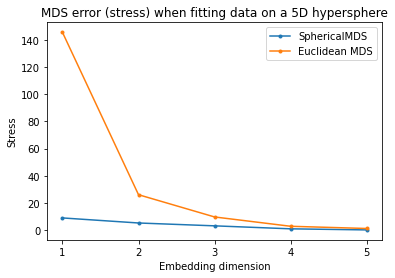

In [4]:
plt.figure()
plt.plot(dims, [mds.stress_ for mds in sphere_mds], marker='.', label='SphericalMDS')
plt.plot(dims, [mds.stress_ for mds in euclid_mds], marker='.', label='Euclidean MDS')
plt.xlabel('Embedding dimension')
plt.ylabel('Stress')
plt.title(f'MDS error (stress) when fitting data on a {sphere.dim}D hypersphere')
plt.legend()
plt.xticks(dims)
plt.show()

### Now we'll do the reverse - generate d-dimensional Euclidean data


In [5]:
e_points = torch.randn((n, d))
e_pair_dists = torch.zeros(n, n)
for i, pt_i in enumerate(e_points):
    for j, pt_j in enumerate(e_points):
        e_pair_dists[i, j] = torch.linalg.norm(pt_i - pt_j)

# Rescale so that nothing is farther than 3 away (hard-max would be a distance of 'pi')
scale = 3.0 / e_pair_dists.max()
e_points, e_pair_dists = scale * e_points, scale * e_pair_dists

In [6]:
e_sphere_mds = []
e_euclid_mds = []
for d in dims:
    print("d =", d)
    e_sphere_mds.append(SphericalMDS(dim=d, dissimilarity="precomputed").fit(e_pair_dists))
    e_euclid_mds.append(MDS(n_components=d, dissimilarity="precomputed").fit(e_pair_dists))

d = 1
d = 2
d = 3
d = 4
d = 5


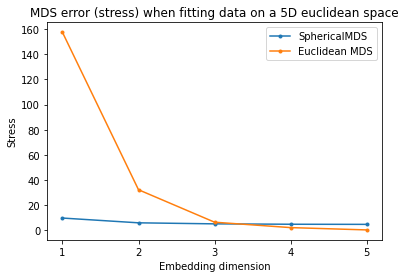

In [7]:
plt.figure()
plt.plot(dims, [mds.stress_ for mds in e_sphere_mds], marker='.', label='SphericalMDS')
plt.plot(dims, [mds.stress_ for mds in e_euclid_mds], marker='.', label='Euclidean MDS')
plt.xlabel('Embedding dimension')
plt.ylabel('Stress')
plt.title(f'MDS error (stress) when fitting data on a {sphere.dim}D euclidean space')
plt.legend()
plt.xticks(dims)
plt.show()